# Clustering(K-means, Hierarchical)
목표: K-means, Hierarchcial Clustering 결과와,
실제 Label(품종) 과의 비교 and 시각화

# 0. 데이터 전처리 (iris data)

0) 필요한 라이브러리 import 

In [15]:
import numpy as np
import pandas as pd

In [16]:
filename='iris.csv'

1) importing flat files with pandas-R의 dataframe과 유사,excel과 유사 
  - numpy로도 가능하지만 array형식이어서,
   
   pandas 형태로 불러들이는 것이 데이터 핸들링에 편하다 (칼럼명도 나와있고)

In [17]:
filename='iris.csv'
data= pd.read_csv(filename)

2) 처음 5개 행만 확인 - R의 head() 함수와 유사

In [18]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 1. K-means Clustering

In [19]:
from sklearn.cluster import KMeans

0) 위에서 불러들인 아이리스 데이터(data)에서, 클러스터링에 쓸 변수만 추출

In [20]:
iris_SP = data[['sepal.length','sepal.width','petal.length','petal.width']]
iris_SP.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1) 데이터 탐색하기( 기초통계량 분석 )

In [21]:
iris_SP.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2) k-means cluster에서, k, 즉 , 군집갯수를 결정해야함 (탐색범위 k=1~15)

In [22]:
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

3) 아래에서 구하려는 그래프 : 군집갯수 k에 따른 SSE plot( Elbow point k 가 opimal number of clusters)

- x축이 cluster 갯수, y축이 SSE: 각 점들이 할당되는 클러스터의 Centroid까지의 거리를 모든 포인트에 대해 합한것
- 이것이 작을수록 좋은 것인데, Elbow point란 이 Y 축이 딱 꺾이는 점 혹은 그 이후 값을 좋은 Cluster 갯수로 택한다. 



Text(0.5, 1.0, 'Selecting k with the Elbow Method')

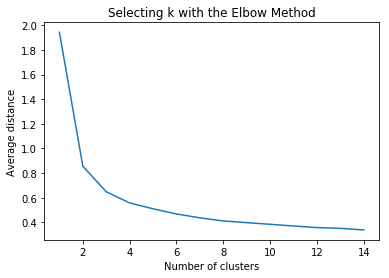

In [25]:
from scipy.spatial.distance import cdist
import matplotlib.pylab as plt
clusters=range(1,15)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_SP)
    clusassign=model.predict(iris_SP)
    meandist.append(sum(np.min(cdist(iris_SP, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_SP.shape[0])

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear

4) 위의 plot 에서 Elbow point를 k=3으로 보고 k=3인 k-means clustering 수행

In [26]:
model = KMeans(n_clusters=3)
model.fit(iris_SP)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


5) 원래 iris data(이름:data)에 k-means clustering 결과 할당된 cluster column 추가
 - 원래 label과 비교 용 : 여러 Insight를 얻을 수 있음
 - 시각화 기능 : 수치로 보는 것보다 시각화는 한 눈에 보기 때문에 더 좋음 

In [31]:
data['predictedY'] = model.labels_

6) K-means 결과 시각화 (x축: petal.length, y축: petal.width, 점의 색깔: 클러스터 결과(0,1,2))

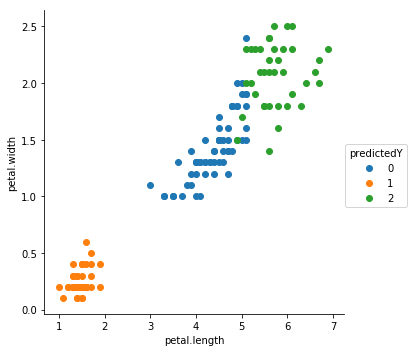

In [32]:
import seaborn as sns;
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="predictedY", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

Insight: 실제 label 을 이용한 시각화- 0과 Setosa, 1과 Versicolor, 2와 Virginica가 매칭되는것을
알수있다.

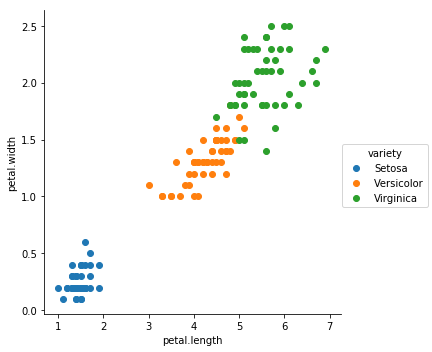

In [33]:
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="variety", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

# 2. Hierarchical Clustering

0) 계층적 군집분석을 위한 패키지 임포트 

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

1) generate the linkage matrix- 여러 연결법(single,complete,...) 중 ward method 선택
- maximum distance 7.08을 기준으로 clustering 자르겠다 - 이 정도면 cluster들끼리
  거리가  
  충분히 많이 난다 - clustering이 잘 됐다 는 기준

In [35]:
Z = linkage(iris_SP, 'ward') 
max_d = 7.08

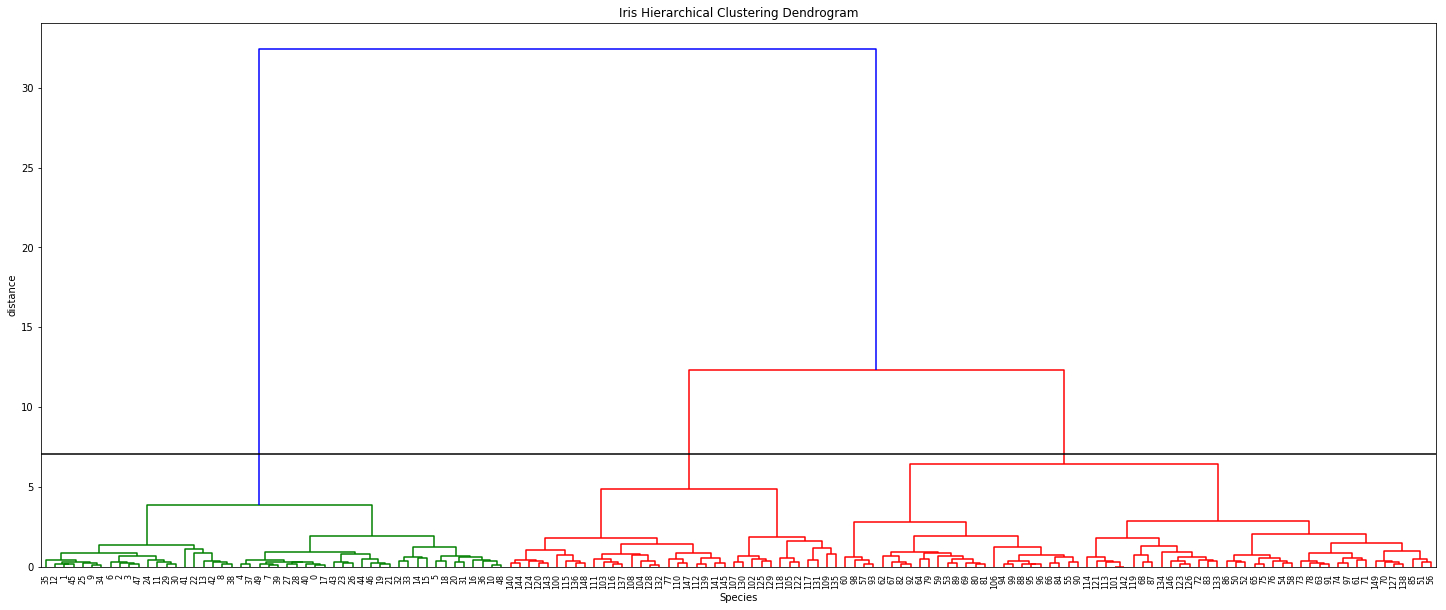

In [36]:
plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

2) 위에서 정한 distance=7.08 (dendrogram 검은색 선) 기준으로 병합적 clustering 자르기 

   - 최종  Cluster 3개 가 나옴 (계층적 중 병합적 방법은 Cluster N개에서 시작하여 1개가  될때까지 진행하지만, 연구자가 Dendrogram을 보아 적당한 거리에서 끊어줘야 함

In [37]:
from scipy.cluster.hierarchy import fcluster
predict = pd.DataFrame(fcluster(Z,7.08,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],data['variety'])
print(ct)

variety  Setosa  Versicolor  Virginica
predict                               
1            50           0          0
2             0           1         35
3             0          49         15


3) 원래 iris data(이름:data)에 Hierarchical clustering 결과 할당된 cluster column 추가
 - 원래 label 및 K-means 결과와 비교 용 : 군집분석 방법별로도 비교 가능
 - 시각화 기능 : 수치로 보는 것보다 시각화는 한 눈에 보기 때문에 더 좋음 - 이 자체로도 하나의 분석 결과(Result)로 각종 논문이나 보고서에 사용 가능

In [38]:
data['HierY']= predict

In [39]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predictedY,HierY
0,5.1,3.5,1.4,0.2,Setosa,1,1
1,4.9,3.0,1.4,0.2,Setosa,1,1
2,4.7,3.2,1.3,0.2,Setosa,1,1
3,4.6,3.1,1.5,0.2,Setosa,1,1
4,5.0,3.6,1.4,0.2,Setosa,1,1


+ 플러스 alpha : confusion matrix 개념으로, K-means 군집분석 결과와 품종 결과를 매칭 해 봄
    
    -여기서는 K-means 결과의 클러스터 0은 Versicolor, 1은 Setosa, 2는 Virginica임을 유추 할 수 있다.

In [46]:
ct = pd.crosstab(data['predictedY'],data['variety'])
print(ct)

variety     Setosa  Versicolor  Virginica
predictedY                               
0                0          48         14
1               50           0          0
2                0           2         36


+ 플러스 alpha : confusion matrix 개념으로, 계층적 군집분석 결과와 품종 결과를 매칭 해 봄
    
    -여기서는 계층적 군집분석 결과의 클러스터 1은 Setosa, 2은 Virginica, 3은 Versicolor임을 유추 할 수 있다.

In [48]:
ct = pd.crosstab(data['HierY'],data['variety'])
print(ct)

variety  Setosa  Versicolor  Virginica
HierY                                 
1            50           0          0
2             0           1         35
3             0          49         15


4) 군집분석 결과 시각화 -그림1. 실제 label 
   (x축: petal.length, y축: petal.width, 점의 색깔: 실제              Label(Setosa,Versicolor,Virginica))

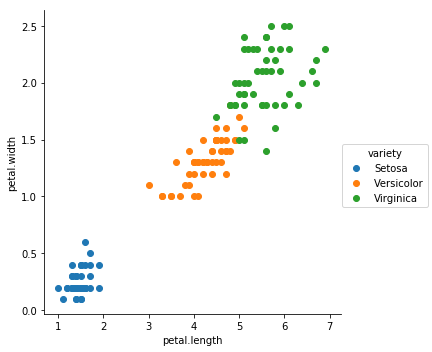

In [49]:
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="variety", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

5) 군집분석 결과 시각화 -그림2. K-means 군집분석 결과 
   (x축: petal.length, y축: petal.width, 점의 색깔: K-means 군집분석 결과(0,1,2))
   - 주의: Cluster 결과의 0,1,2는 그저 Cateogry이지, 다른 군집분석 결과의 1,2,3 등과 매칭되는 개념이 아니라, 그저 하나의 카테고리 일 뿐이다. 거리 개념 등도 없음

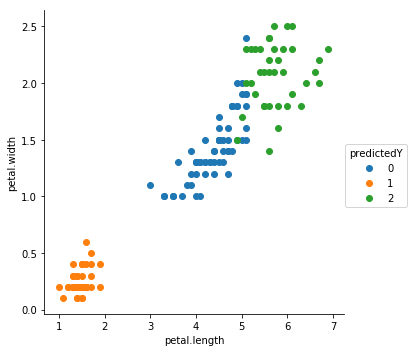

In [50]:
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="predictedY", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

6) 군집분석 결과 시각화 -그림3. 계층적 군집분석 결과
   (x축: petal.length, y축: petal.width, 점의 색깔: 계층적 군집분석 결과(1,2,3))

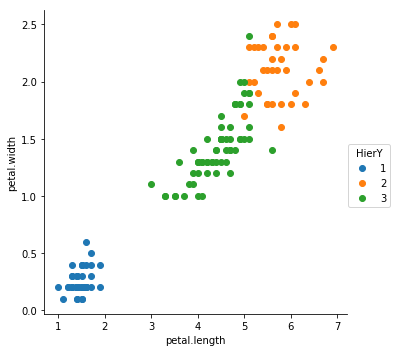

In [51]:
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="HierY", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()